# Import Dependencies

In [2]:
import sys
sys.path.append("../code-python3")
from collections import Counter
from functools import partial
from linear_algebra import dot
import math, random
import matplotlib
import matplotlib.pyplot as plt


# Perceptrons

In [3]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """returns 1 if the perceptron 'fires', 0 if not"""
    return step_function(dot(weights, x) + bias)



In [10]:
# AND gate
weights = [2, 2]
bias = -3

print(perceptron_output(weights, bias, [1,1]))
print(perceptron_output(weights, bias, [0,1]))
print(perceptron_output(weights, bias, [1,0]))
print(perceptron_output(weights, bias, [0,0]))

1
0
0
0


In [11]:
# OR gate
weights = [2, 2]
bias = -1

print(perceptron_output(weights, bias, [1,1]))
print(perceptron_output(weights, bias, [0,1]))
print(perceptron_output(weights, bias, [1,0]))
print(perceptron_output(weights, bias, [0,0]))

1
1
1
0


In [15]:
# NOT gate
weights = [-2]
bias = 1

print(perceptron_output(weights, bias, [1]))
print(perceptron_output(weights, bias, [0]))

0
1


In [16]:
and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x == y else 1

In [19]:
print(and_gate(1, 1))
print(and_gate(0, 1))
print(and_gate(1, 0))
print(and_gate(0, 0))

1
0
0
0


In [20]:
print(or_gate(1, 1))
print(or_gate(0, 1))
print(or_gate(1, 0))
print(or_gate(0, 0))

1
1
1
0


In [21]:
print(xor_gate(1, 1))
print(xor_gate(0, 1))
print(xor_gate(1, 0))
print(xor_gate(0, 0))

0
1
1
0


# Feed-Forward Neural Networks

In [30]:
def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs



In [35]:
xor_network = [ # hidden layer
                [[20, 20, -30],
                 [20, 20, -10]],
                [[-60, 60, -30]]]

for x in [0, 1]:
    for y in [0, 1]:
        print(x, y, feed_forward(xor_network, [x, y])[-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


# Backpropagation

In [36]:
def backpropagate(network, input_vector, target):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # adjust weights for output layer (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

# Example: Defeating a CAPTCHA

In [37]:
raw_digits = [
      """11111
         1...1
         1...1
         1...1
         11111""",

      """..1..
         ..1..
         ..1..
         ..1..
         ..1..""",

      """11111
         ....1
         11111
         1....
         11111""",

      """11111
         ....1
         11111
         ....1
         11111""",

      """1...1
         1...1
         11111
         ....1
         ....1""",

      """11111
         1....
         11111
         ....1
         11111""",

      """11111
         1....
         11111
         1...1
         11111""",

      """11111
         ....1
         ....1
         ....1
         ....1""",

      """11111
         1...1
         11111
         1...1
         11111""",

      """11111
         1...1
         11111
         ....1
         11111"""]

def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]

In [39]:
inputs = list(map(make_digit, raw_digits))

In [40]:
inputs

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [41]:
targets = [[1 if i == j else 0 for i in range(10)]
            for j in range(10)]

In [42]:
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [43]:
random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25
num_hidden = 5   # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)]
                for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)]
                for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]

In [48]:
# 10,000 iterations seems enough to converge
for __ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

In [50]:
def predict(input):
    return feed_forward(network, input)[-1]

for i, input in enumerate(inputs):
    outputs = predict(input)
    print(i, [round(p,2) for p in outputs])

0 [0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.03, 0.0]
1 [0.0, 0.96, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2 [0.0, 0.02, 0.96, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0]
3 [0.0, 0.03, 0.0, 0.97, 0.0, 0.0, 0.0, 0.02, 0.0, 0.03]
4 [0.0, 0.02, 0.0, 0.0, 0.98, 0.0, 0.0, 0.01, 0.0, 0.0]
5 [0.0, 0.0, 0.02, 0.0, 0.0, 0.96, 0.01, 0.0, 0.02, 0.02]
6 [0.0, 0.0, 0.01, 0.0, 0.01, 0.02, 0.99, 0.0, 0.01, 0.0]
7 [0.03, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.97, 0.0, 0.0]
8 [0.03, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.96, 0.03]
9 [0.0, 0.0, 0.0, 0.01, 0.0, 0.02, 0.0, 0.0, 0.02, 0.96]


In [51]:
print(""".@@@.
...@@
..@@.
...@@
.@@@.""")
print([round(x, 2) for x in
      predict(  [0,1,1,1,0,    # .@@@.
                 0,0,0,1,1,    # ...@@
                 0,0,1,1,0,    # ..@@.
                 0,0,0,1,1,    # ...@@
                 0,1,1,1,0])]) # .@@@.
print()

print(""".@@@.
@..@@
.@@@.
@..@@
.@@@.""")
print([round(x, 2) for x in
      predict(  [0,1,1,1,0,    # .@@@.
                 1,0,0,1,1,    # @..@@
                 0,1,1,1,0,    # .@@@.
                 1,0,0,1,1,    # @..@@
                 0,1,1,1,0])]) # .@@@.
print()

.@@@.
...@@
..@@.
...@@
.@@@.
[0.0, 0.0, 0.0, 0.93, 0.0, 0.0, 0.0, 0.01, 0.0, 0.1]

.@@@.
@..@@
.@@@.
@..@@
.@@@.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.54, 0.0, 0.0, 0.91, 1.0]



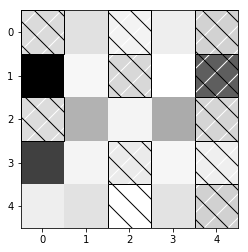

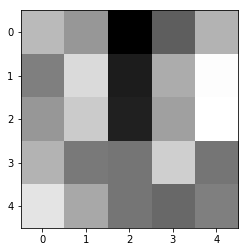

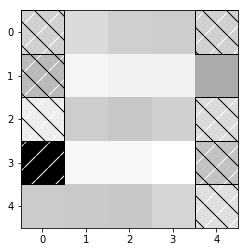

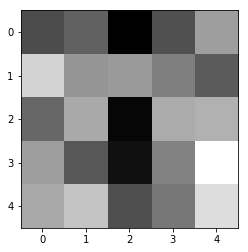

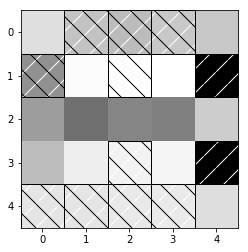

In [59]:
def patch(x, y, hatch, color):
    """return a matplotlib 'patch' object with the specified
    location, crosshatch pattern, and color"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                        hatch=hatch, fill=False, color=color)


def show_weights(neuron_idx):
    weights = network[0][neuron_idx]
    abs_weights = [abs(weight) for weight in weights]

    grid = [abs_weights[row:(row+5)] # turn the weights into a 5x5 grid
            for row in range(0,25,5)] # [weights[0:5], ..., weights[20:25]]

    ax = plt.gca() # to use hatching, we'll need the axis

    ax.imshow(grid, # here same as plt.imshow
              cmap=matplotlib.cm.binary, # use white-black color scale
              interpolation='none') # plot blocks as blocks

    # cross-hatch the negative weights
    for i in range(5): # row
        for j in range(5): # column
            if weights[5*i + j] < 0: # row i, column j = weights[5*i + j]
                # add black and white hatches, so visible whether dark or light
                ax.add_patch(patch(j, i, '/', "white"))
                ax.add_patch(patch(j, i, '\\', "black"))
    plt.show()
    
for i in range(5):
    show_weights(i)

In [60]:
my_three = [0,1,1,1,0,     # .@@@.
             0,0,0,1,1,    # ...@@
             0,0,1,1,0,    # ..@@.
             0,0,0,1,1,    # ...@@
             0,1,1,1,0]    # .@@@.

hidden, output = feed_forward(network, my_three)

In [61]:
hidden

[0.10387769329168753,
 0.9999785242978947,
 0.9999999993558526,
 0.9999921711029089,
 3.1767927409496455e-07]

In [62]:
output

[1.0101045598243533e-08,
 0.001726887935497551,
 1.78191113310607e-08,
 0.9344276025778887,
 5.097944343977291e-07,
 3.6294250408123e-06,
 2.2726529247374686e-10,
 0.007047567870016199,
 3.9216678958134186e-08,
 0.09973408445781098]

In [63]:
network[-1][3]

[-11.527644390098375,
 -2.178890476966917,
 9.362089906951441,
 -1.3913205450697117,
 -11.547190694429755,
 -1.9376884722879057]